In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [158]:
path = r'/content/drive/MyDrive/Colab Notebooks/' 

# columns_to_skip = ['songtitle','artistname']
# base = pd.read_csv(path+'music_data.csv',  usecols=lambda x: x not in columns_to_skip,encoding='latin-1')
diab_data_raw = pd.read_csv(path+'diabetes.csv')

In [159]:
diab_data_raw.shape

(768, 9)

In [160]:
diab_data_raw.describe().style.background_gradient(cmap='Reds')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [161]:
diab_data_raw.describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

,min,mean,max
Pregnancies,0.000000,3.845052,17.000000
Glucose,0.000000,120.894531,199.000000
BloodPressure,0.000000,69.105469,122.000000
SkinThickness,0.000000,20.536458,99.000000
Insulin,0.000000,79.799479,846.000000
BMI,0.000000,31.992578,67.100000
DiabetesPedigreeFunction,0.078000,0.471876,2.420000
Age,21.000000,33.240885,81.000000
Outcome,0.000000,0.348958,1.000000


In [164]:
# printing the first 5 rows of the dataset
diab_data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [165]:
diab_data_raw['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

percentage of Target 0: 65.10416666666666
percentage of Target 1: 34.89583333333333


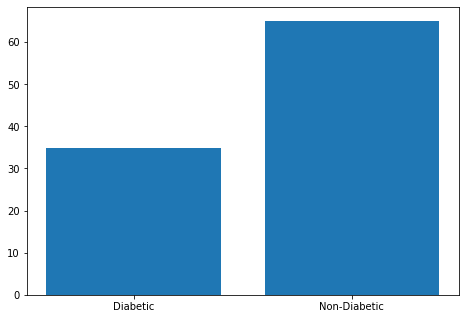

In [170]:
Non_diabetic_count = len(diab_data_raw[diab_data_raw['Outcome']==0])
diabetic_count = len(diab_data_raw[diab_data_raw['Outcome']==1])

percent_of_no_diabetics = Non_diabetic_count/(Non_diabetic_count+diabetic_count)
print("percentage of Target 0:", percent_of_no_diabetics*100)

percent_of_diabetic = diabetic_count/(Non_diabetic_count+diabetic_count)

print("percentage of Target 1:", percent_of_diabetic*100)


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Diabetic', 'Non-Diabetic']
values = [percent_of_diabetic*100,percent_of_no_diabetics*100]
ax.bar(x,values)
plt.show()

In [173]:
diab_data_raw.groupby('Outcome').mean()   ##Mean by outcome 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [176]:
diab_data_raw.isnull().sum()  ##Checking NA's

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
##CHECKING ZEROES 

count = (diab_data_raw == 0).sum()
print('Number of zeroes',count)


Number of zeroes Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [178]:
##TREATING ZEROES 
## Droping all Zeroes of insulin

diab_data = diab_data_raw.copy()
diab_data = diab_data[diab_data.Insulin > 0]
diab_data.shape

(394, 9)

In [179]:
count = (diab_data == 0).sum()
print('Number of zeroes',count)

Number of zeroes Pregnancies                  57
Glucose                       1
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                     264
dtype: int64


In [180]:
#Replacing the zero values in the Glucose and BMI columns with their respective column medians:
diab_data['Glucose'] = diab_data['Glucose'].replace(to_replace = [0], value = [np.median(diab_data.Glucose)])
diab_data['BMI'] = diab_data['BMI'].replace(to_replace = [0], value = [np.median(diab_data.BMI)])

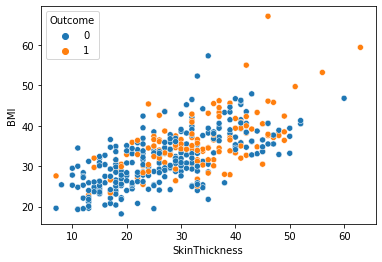

In [181]:
## EDA 
import seaborn as sns
sns.scatterplot(data=diab_data, x="SkinThickness", y="BMI", hue="Outcome")



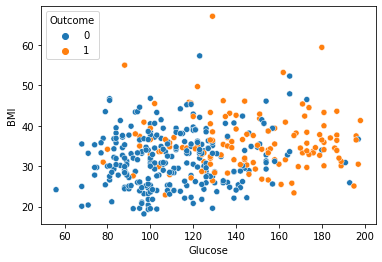

In [182]:
import seaborn as sns
sns.scatterplot(data=diab_data, x="Glucose", y="BMI", hue="Outcome")




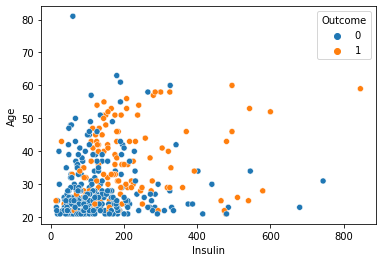

In [ ]:
sns.scatterplot(data=diab_data, x="Insulin", y="Age", hue="Outcome")

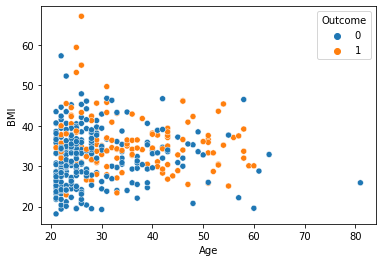

In [183]:
sns.scatterplot(data=diab_data, x="Age", y="BMI", hue="Outcome")

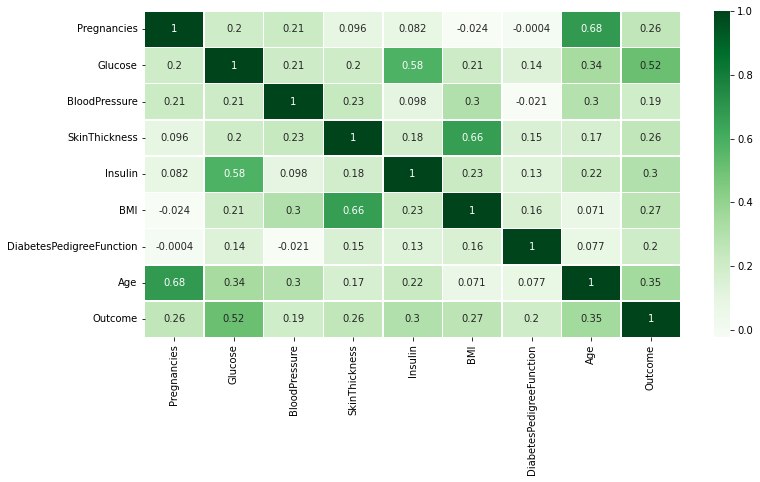

In [184]:
##GENERATING CORRELATION MATRIX of DATA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


#Plotting a correlation matrix:
corr_matrix = diab_data.corr()
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Greens', linewidths = 0.5, ax = ax)
plt.show()



##Glucouse and Diabetes have a correlation value of 0.52

#Age and Diabetes has a correlation value of 0.35

# BMI and Diabetes have correlation value of 0.27 and 0.26

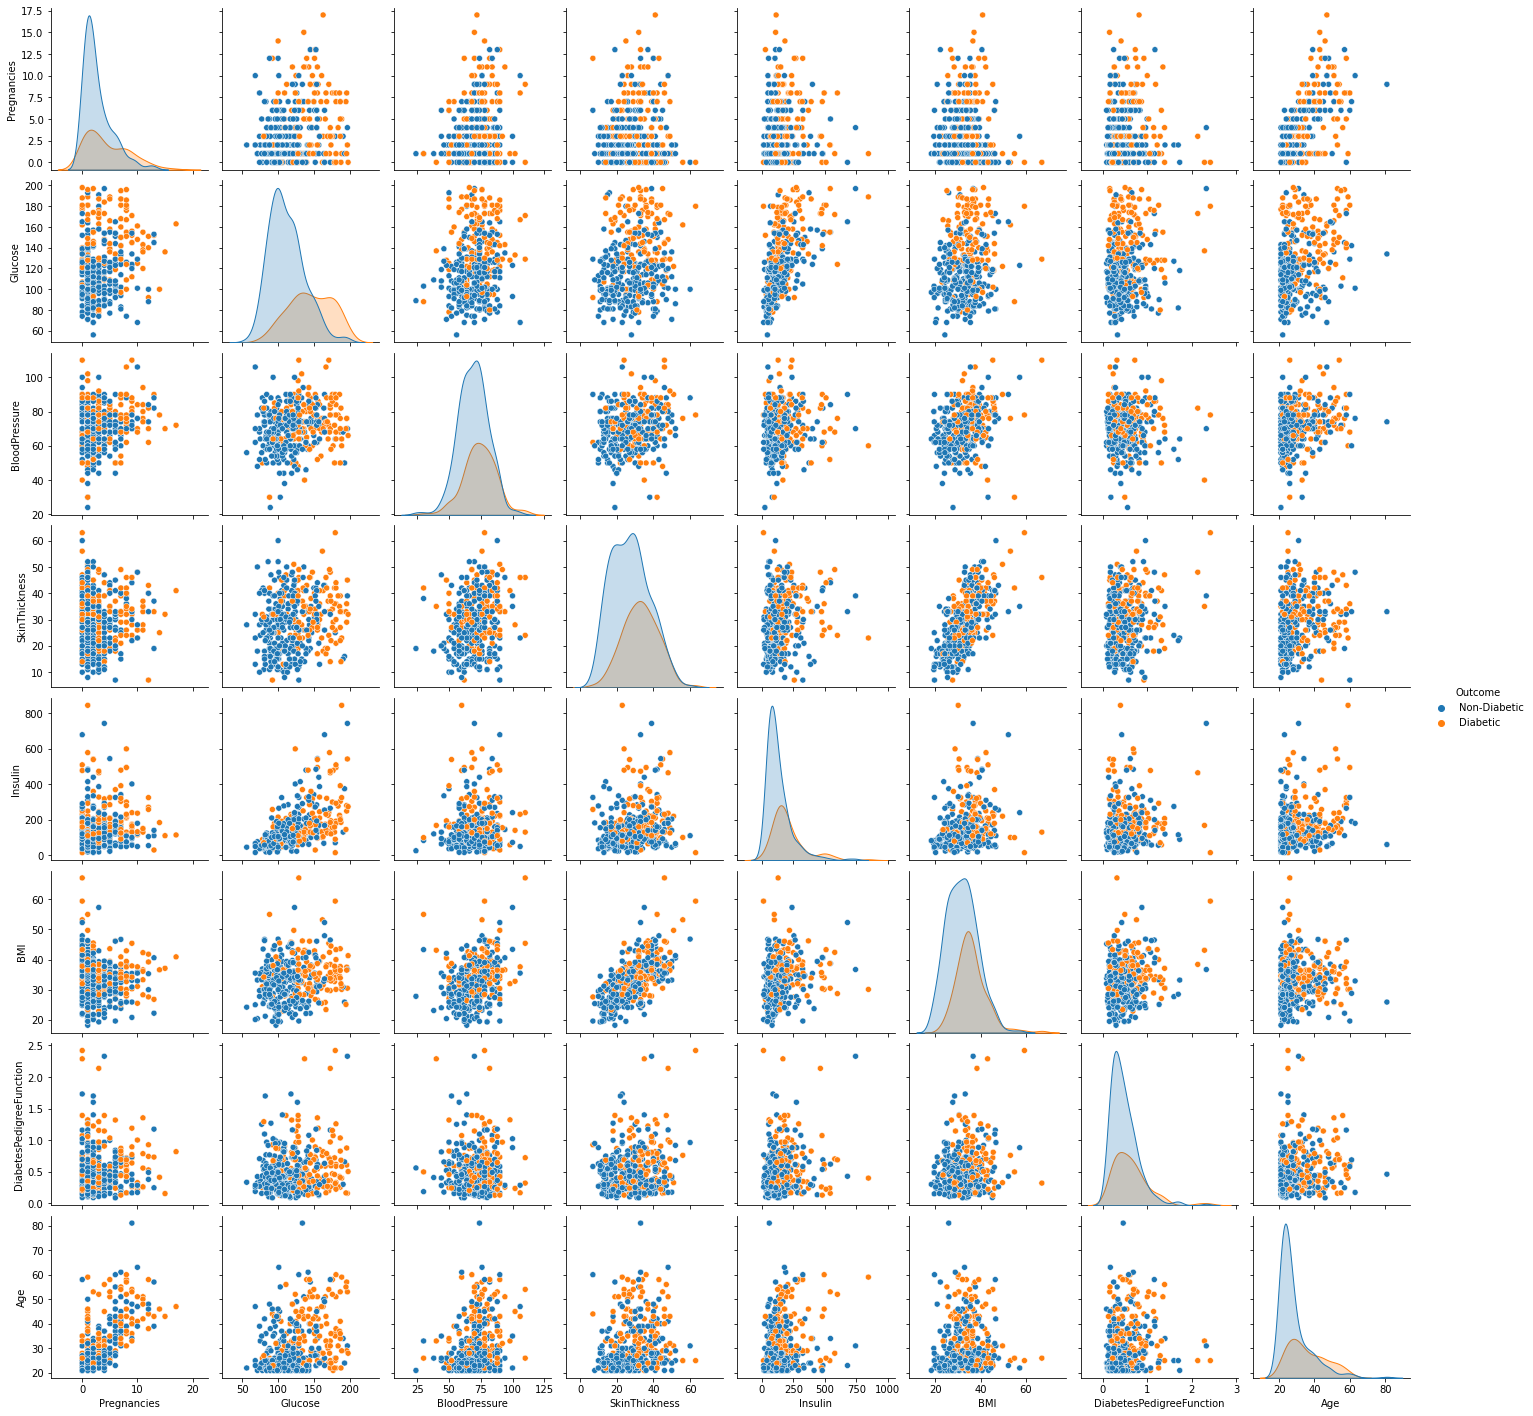

In [185]:
## just to see Seaborn pairplot I am converting it into categorical becoz it takes only categorical data and creating temporary dataframe from our data

df_temp = diab_data.copy()

df_temp['Outcome'] = np.where(df_temp['Outcome']==1, "Diabetic", "Non-Diabetic")

sns.pairplot(df_temp,hue='Outcome')


In [ ]:
##BIvariate Analysis 




In [186]:
diab_data.describe().T.style.background_gradient(cmap='PuBuGn')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,394.000000,3.286802,3.209635,0.000000,1.000000,2.000000,5.000000,17.000000
Glucose,394.000000,122.606599,30.783576,56.000000,99.000000,119.000000,143.000000,198.000000
BloodPressure,394.000000,70.654822,12.469919,24.000000,62.000000,70.000000,78.000000,110.000000
SkinThickness,394.000000,29.106599,10.504273,7.000000,21.000000,29.000000,36.750000,63.000000
Insulin,394.000000,155.548223,118.775855,14.000000,76.250000,125.000000,190.000000,846.000000
BMI,394.000000,33.072843,7.015007,18.200000,28.400000,33.200000,37.075000,67.100000
DiabetesPedigreeFunction,394.000000,0.525543,0.350127,0.085000,0.270250,0.449500,0.687000,2.420000
Age,394.000000,30.814721,10.198971,21.000000,23.000000,27.000000,36.000000,81.000000
Outcome,394.000000,0.329949,0.470792,0.000000,0.000000,0.000000,1.000000,1.000000


In [187]:
##Importing model libs

import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [188]:
# separating the data and labels
X = diab_data.drop(columns = 'Outcome', axis=1)
Y = diab_data['Outcome']           ###Removing target from train data and storing in target variable 

In [ ]:
##PROCESSED X AND Y DATA 



In [189]:
#SCALING 
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)



In [190]:

print(standardized_data)


[[-0.71338621 -1.09309354 -0.37375871 ... -0.70978761 -1.02533958
  -0.96354812]
 [-1.02534421  0.46816203 -2.46142734 ...  1.43120396  5.04016543
   0.21453709]
 [-0.08947019 -1.45088128 -1.65847787 ... -0.29586258 -0.79370078
  -0.47267928]
 ...
 [-0.4014282  -1.1256197  -1.01611829 ... -0.66696778  0.68764368
  -0.86537435]
 [ 2.09423587 -0.70277965  0.42919076 ... -0.02467031 -1.01390063
   3.15975012]
 [ 0.53444583 -0.05225649  0.10801097 ... -0.98097988 -0.80227999
  -0.07998421]]


In [191]:
X_stand = standardized_data
Y = diab_data['Outcome']

In [192]:
##PREPARING DATA FOR LOGISTIC REGRESSION WITHOUT BEST RANDOM STATE

X_train, X_test, Y_train, Y_test = train_test_split(X_stand,Y, test_size = 0.2, stratify=Y, random_state=2)

In [193]:
print(X.shape, X_train.shape, X_test.shape)

(394, 8) (315, 8) (79, 8)


In [194]:
print(X.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0             66             23       94  28.1   
4             0    137.0             40             35      168  43.1   
6             3     78.0             50             32       88  31.0   
8             2    197.0             70             45      543  30.5   
13            1    189.0             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  
3                      0.167   21  
4                      2.288   33  
6                      0.248   26  
8                      0.158   53  
13                     0.398   59  


In [195]:
###METHOD FOR ACCURACY, classification report and confusion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")

        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [196]:
##CHECKING AND RUNNING LOGISTIC  

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty='l2', solver='liblinear') 
logistic_regression.fit(X_train, Y_train)



LogisticRegression(solver='liblinear')

In [197]:
##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH L2 REGULARIZATION")
print_score(logistic_regression, X_train, Y_train, X_test, Y_test, train=True)
print_score(logistic_regression, X_train, Y_train, X_test, Y_test, train=False)

CHECKING SCORE ACCURACY WITH L2 REGULARIZATION
Train Result:
Accuracy Score: 78.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.807692    0.728395  0.787302    0.768044      0.781512
recall       0.895735    0.567308  0.787302    0.731521      0.787302
f1-score     0.849438    0.637838  0.787302    0.743638      0.779576
support    211.000000  104.000000  0.787302  315.000000    315.000000
_______________________________________________
Confusion Matrix: 
 [[189  22]
 [ 45  59]]

Test Result:
Accuracy Score: 79.75%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.836364   0.708333  0.797468   0.772348      0.794227
recall      0.867925   0.653846  0.797468   0.760885      0.797468
f1-score    0.851852   0.680000  0.797468   0.765926      0.795293
support    53.000000  26.000

[[46  7]
 [ 9 17]]


Text(69.0, 0.5, 'Predicted Values')

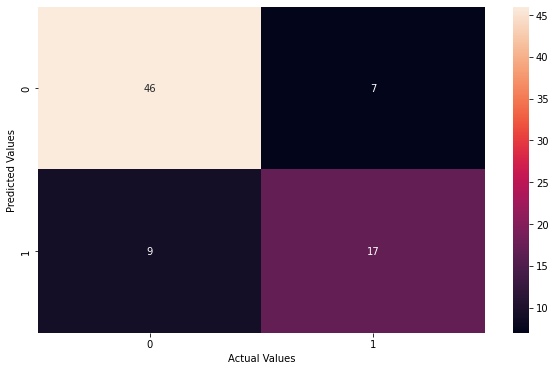

In [199]:
logis_pred = logistic_regression.predict(X_test)

conf_matrix = confusion_matrix(Y_test, logis_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


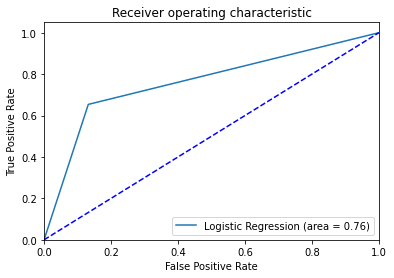

In [200]:
###GENERATING ROC CURVE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
    
logit_roc_auc = roc_auc_score(Y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logistic_regression.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
##Now running SVM MODEL on DATA to check



In [201]:
###SVM MODEL

classifier = svm.SVC(kernel='linear')


#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [202]:
##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH CLASSIFIER ")
print_score(classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(classifier, X_train, Y_train, X_test, Y_test, train=False)

CHECKING SCORE ACCURACY WITH CLASSIFIER 
Train Result:
Accuracy Score: 78.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.805085    0.734177  0.787302    0.769631      0.781674
recall       0.900474    0.557692  0.787302    0.729083      0.787302
f1-score     0.850112    0.633880  0.787302    0.741996      0.778721
support    211.000000  104.000000  0.787302  315.000000    315.000000
_______________________________________________
Confusion Matrix: 
 [[190  21]
 [ 46  58]]

Test Result:
Accuracy Score: 78.48%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.695652   0.78481   0.758540      0.780034
recall      0.867925   0.615385   0.78481   0.741655      0.784810
f1-score    0.844037   0.653061   0.78481   0.748549      0.781184
support    53.000000  26.000000   

[[46  7]
 [10 16]]


Text(69.0, 0.5, 'Predicted Values')

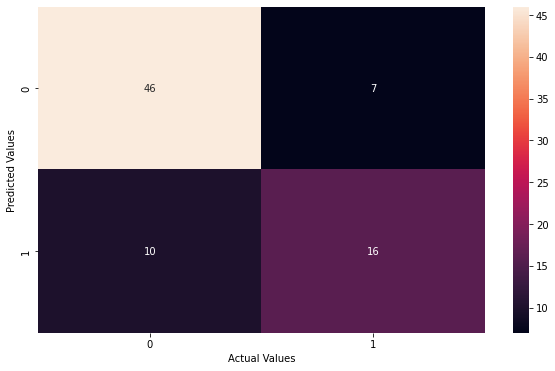

In [203]:
##JUST PRINTING CONFUSION MATRIX FOR SVM
svm_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, svm_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

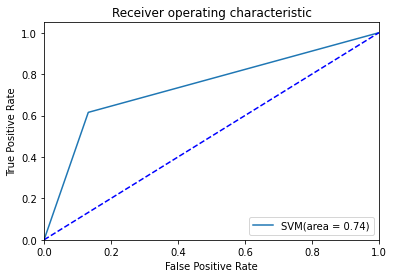

In [204]:
###GENERATING ROC CURVE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
    
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='SVM(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [205]:
##NOW TRYING RANDOM FOREST MODEL 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [206]:
##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH Random Forest ")
print_score(random_forest, X_train, Y_train, X_test, Y_test, train=True)
print_score(random_forest, X_train, Y_train, X_test, Y_test, train=False)

CHECKING SCORE ACCURACY WITH Random Forest 
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    211.0  104.0       1.0      315.0         315.0
_______________________________________________
Confusion Matrix: 
 [[211   0]
 [  0 104]]

Test Result:
Accuracy Score: 82.28%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.830508   0.800000  0.822785   0.815254      0.820468
recall      0.924528   0.615385  0.822785   0.769956      0.822785
f1-score    0.875000   0.695652  0.822785   0.785326      0.815974
support    53.000000  26.000000  0.822785  79.000000     79.000000
__________________

[[49  4]
 [10 16]]


Text(69.0, 0.5, 'Predicted Values')

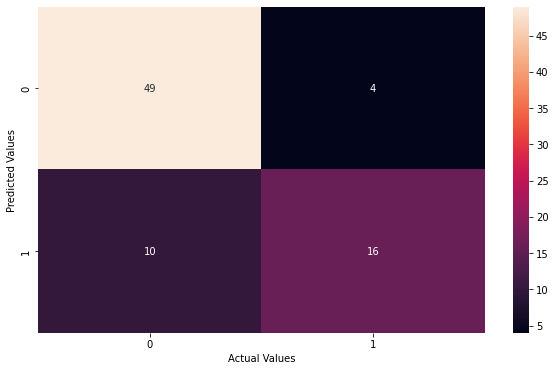

In [207]:
##JUST PRINTING CONFUSION MATRIX FOR SVM
rf_pred = random_forest.predict(X_test)
conf_matrix = confusion_matrix(Y_test, rf_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

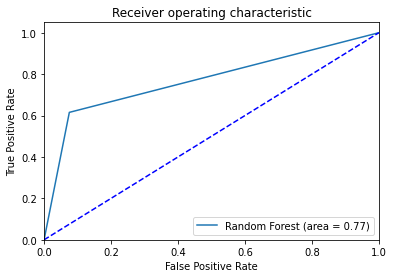

In [208]:
###GENERATING ROC CURVE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
    
logit_roc_auc = roc_auc_score(Y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, random_forest.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [209]:
from sklearn.metrics import roc_auc_score
y_pred_proba = random_forest.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,y_pred_proba)


0.920899854862119

In [ ]:
###NOW TRYING WITH BEST RANDOM STATE IN LOGISTIC MODEL

In [210]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data_bestrandomstate = scaler.transform(X)

In [211]:

#Finding the accuracies on different random states during train test splitting since the dataset is quite small and different samples can lead to significantly different accuracy scores:
from sklearn.linear_model import LogisticRegression
accuracy_scores = []
x = range(0,101)

for i in x:
    X_train, X_test, y_train, y_test = train_test_split(standardized_data, Y, test_size=0.2, random_state=i)
    logistic_regression_beststate = LogisticRegression()
    logistic_regression_beststate.fit(X_train,y_train)
    logistic_regression_beststate = logistic_regression_beststate.predict(X_test)
    Logit_Score = accuracy_score(y_test,logistic_regression_beststate)
    accuracy_scores.append(Logit_Score)



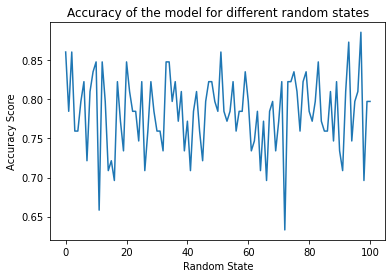

In [212]:

plt.plot(x, accuracy_scores)
plt.title("Accuracy of the model for different random states")
plt.ylabel('Accuracy Score')
plt.xlabel('Random State')
plt.show()

In [213]:
#Finding the random state that offers the highest accuracy:
highest_value = max(accuracy_scores)
highest_randomstate = accuracy_scores.index(highest_value)
print("The highest accuracy is:", highest_value)
print("The random state that offers the highest accuracy is:", highest_randomstate)

The highest accuracy is: 0.8860759493670886
The random state that offers the highest accuracy is: 97


In [214]:
##STANDARDIZATION DATA 

scaler = StandardScaler()
scaler.fit(X)
standardized_data_bestrandomstate = scaler.transform(X)

In [215]:
#Splitting the dataset into training and testing set based on the best random state found:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(standardized_data_bestrandomstate, Y, test_size=0.2, random_state = highest_randomstate)

In [216]:
#Fitting the data on the logistic regression model and making predictions:
Logit_Model = LogisticRegression(solver='liblinear',penalty='l2')
Logit_Model.fit(X_train_best,y_train_best)




LogisticRegression(solver='liblinear')

In [217]:
#Printing the classification reports:
Logit_Prediction = Logit_Model.predict(X_test_best)
Logit_Report = classification_report(y_test_best,Logit_Prediction)
print("Logistic Regression Classification Report:\n\n", Logit_Report)
Logit_Score = accuracy_score(y_test_best,Logit_Prediction)

print("Logistic Score:\n\n", Logit_Score)

Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.82      0.70      0.76        20

    accuracy                           0.89        79
   macro avg       0.86      0.82      0.84        79
weighted avg       0.88      0.89      0.88        79

Logistic Score:

 0.8860759493670886


In [218]:
##Testing Accuracy and Printing Confusion matrix
print("CHECKING SCORE ACCURACY WITH best random state")


print_score(Logit_Model, X_train_best, y_train_best, X_test_best, y_test_best, train=True)
print_score(Logit_Model, X_train_best, y_train_best, X_test_best, y_test_best, train=False)

CHECKING SCORE ACCURACY WITH best random state
Train Result:
Accuracy Score: 75.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.784141    0.693182   0.75873    0.738661      0.752377
recall       0.868293    0.554545   0.75873    0.711419      0.758730
f1-score     0.824074    0.616162   0.75873    0.720118      0.751470
support    205.000000  110.000000   0.75873  315.000000    315.000000
_______________________________________________
Confusion Matrix: 
 [[178  27]
 [ 49  61]]

Test Result:
Accuracy Score: 88.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.903226   0.823529  0.886076   0.863378      0.883050
recall      0.949153   0.700000  0.886076   0.824576      0.886076
f1-score    0.925620   0.756757  0.886076   0.841188      0.882870
support    59.000000  20.000

[[56  3]
 [ 6 14]]


Text(69.0, 0.5, 'Predicted Values')

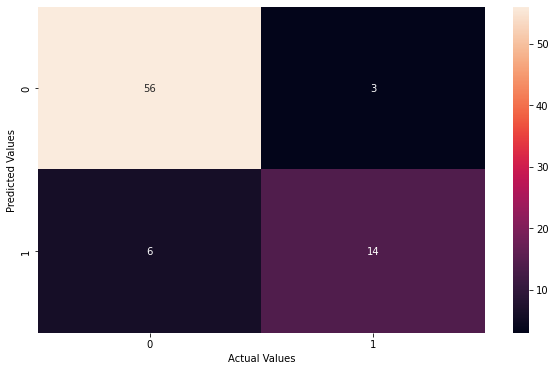

In [219]:
##JUST PRINTING CONFUSION MATRIX FOR Best Logistic
logisFinal_pred = Logit_Model.predict(X_test_best)
conf_matrix = confusion_matrix(y_test_best, logisFinal_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

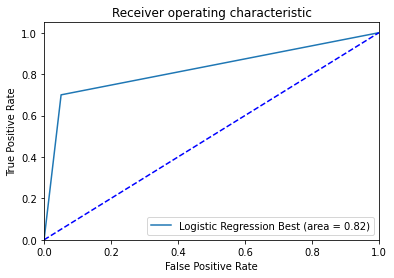

In [220]:
###GENERATING ROC CURVE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
    
logit_roc_auc = roc_auc_score(y_test_best, Logit_Model.predict(X_test_best))
fpr, tpr, thresholds = roc_curve(y_test_best, Logit_Model.predict(X_test_best))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Best (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [221]:
from sklearn.metrics import roc_auc_score
y_pred_proba = Logit_Model.predict_proba(X_test_best)[:,1]
roc_auc_score(y_test_best,y_pred_proba)

0.9135593220338982

#NOW THIS PART IS JUST FOR EXPERIMENT PURPOSE WE CAN SKIP 

In [222]:

import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result= logit_model.fit(method='bfgs')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.562324
         Iterations: 20
         Function evaluations: 26
         Gradient evaluations: 26
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.113     
Dependent Variable:    Outcome            AIC:                459.1114  
Date:                  2022-05-24 04:24   BIC:                490.9223  
No. Observations:      394                Log-Likelihood:     -221.56   
Df Model:              7                  LL-Null:            -249.85   
Df Residuals:          386                LLR p-value:        7.2013e-10
Converged:             1.0000             Scale:              1.0000    
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1307   0.0490  2.6690 0.00

In [ ]:
cols = ['Pregnancies' ,'Glucose', 'BloodPressure', 'SkinThickness']

X_check = X[cols]



In [ ]:
print(X_check)

     Pregnancies  Glucose  BloodPressure  SkinThickness
3              1     89.0             66             23
4              0    137.0             40             35
6              3     78.0             50             32
8              2    197.0             70             45
13             1    189.0             60             23
..           ...      ...            ...            ...
753            0    181.0             88             44
755            1    128.0             88             39
760            2     88.0             58             26
763           10    101.0             76             48
765            5    121.0             72             23

[394 rows x 4 columns]


In [ ]:

scaler = StandardScaler()
scaler.fit(X_check)
X_stand_check = scaler.transform(X_check)

In [ ]:
#Splitting the dataset into training and testing set based on the best random state found:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_stand_check, Y, test_size=0.2, random_state = highest_randomstate)

In [ ]:
#Fitting the data on the logistic regression model and making predictions:
Logit_Model_check = LogisticRegression()
Logit_Model_check.fit(X_train_check,y_train_check)

LogisticRegression()

In [ ]:

print("CHECKING SCORE ACCURACY WITH CHECK")


print_score(Logit_Model_check, X_train_check, y_train_check, X_test_check, y_test_check, train=True)
print_score(Logit_Model_check, X_train_check, y_train_check, X_test_check, y_test_check, train=False)

CHECKING SCORE ACCURACY WITH CHECK
Train Result:
Accuracy Score: 76.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.792793    0.688172  0.761905    0.740482      0.756259
recall       0.858537    0.581818  0.761905    0.720177      0.761905
f1-score     0.824356    0.630542  0.761905    0.727449      0.756675
support    205.000000  110.000000  0.761905  315.000000    315.000000
_______________________________________________
Confusion Matrix: 
 [[176  29]
 [ 46  64]]

Test Result:
Accuracy Score: 84.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.885246   0.722222  0.848101   0.803734      0.843974
recall      0.915254   0.650000  0.848101   0.782627      0.848101
f1-score    0.900000   0.684211  0.848101   0.792105      0.845370
support    59.000000  20.000000  0.84810

In [ ]:
##CHECKING SYSTEM with some input data

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:


##SAVING MODEL AS PICKLE FILE 
import pickle
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(Logit_Model, files)




In [ ]:
##SAVING MODEL USING STREAMLIT 

filename = 'trained_model.sav'  ##name of file saving 
pickle.dump(Logit_Model, open(filename, 'wb'))    ### opening a file trained_model and writing a model using binary

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))   ##now reading binary 

In [ ]:
##CHECKING THE LOADED MODEL on some INPUT DATA 

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
